# Definitions

In [19]:
from modules import *
import stats
import principal_angles as pa

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Training

In [2]:
# The parameters of the experiment

seq = [[0,0,0,0],[0,0,0,1],[0,1,0,1],[0,0,1,1]] # sequence structures to be used
seq_test = [[0,0,0,0],[0,0,0,1],[0,1,0,1],[0,0,1,1],[0,1,1,1]]
Nseq = len(seq_test)
repeats = 10  # repeats per chunk in each sequence
input_dim = [40]  # dimensionality of the input
dict_size = 10  # size of stimulus dictionary, can be input_size at max
n_hidden = 200
n_layers = 1
ntrials = dict_size * dict_size - dict_size  # all possible pairs of stimuli are trials

In [3]:
# produce random stimuli:
si = 0
input_size = 40
dictionary = np.random.randn(dict_size,input_size) # use same size as for the one-hot encoding
# plt.imshow(dictionary)
# plt.show()

# get unique pairs of stimuli
pairs = unique_pairs(dictionary)

# create training and test data
sequence = unique_pairs_sequence(seq, repeats, pairs)
test_sequence = unique_pairs_sequence(seq_test, repeats, pairs)

# One single model

In [4]:
trainind = np.delete(np.arange(ntrials), 0)
train_x = []
train_y = []
# create data from numpy arrrays
for i in range(len(seq)):
    train_x.append(torch.Tensor(sequence[i][trainind,:-1,:])) #!!-1 if no zero element after each chunk, otherwise -2
    train_y.append(torch.Tensor(sequence[i][trainind,-1,:]))
model = RNN(n_hidden, n_layers, input_size)
Loss = train_model(train_x, train_y, model)


In [5]:
y, h = predict_single(torch.Tensor(test_sequence[4][0:1]), model)

In [6]:
h

array([[ 0.30326772, -0.18248953,  0.69487303, ..., -0.55272305,
         0.54574764, -0.53096634],
       [-0.7335691 , -0.09595732,  0.11653936, ..., -0.53554535,
        -0.652881  , -0.7439794 ],
       [ 0.42278898, -0.17094275, -0.58093387, ...,  0.64625233,
         0.09291331,  0.6782917 ],
       ...,
       [-0.6771894 ,  0.3487643 , -0.26149952, ..., -0.7731463 ,
        -0.957582  , -0.48337647],
       [ 0.89430624,  0.5472538 , -0.32461962, ..., -0.17868677,
        -0.31347445,  0.80659616],
       [-0.03687478, -0.5115341 , -0.585444  , ...,  0.16919415,
        -0.5637481 ,  0.81985945]], dtype=float32)

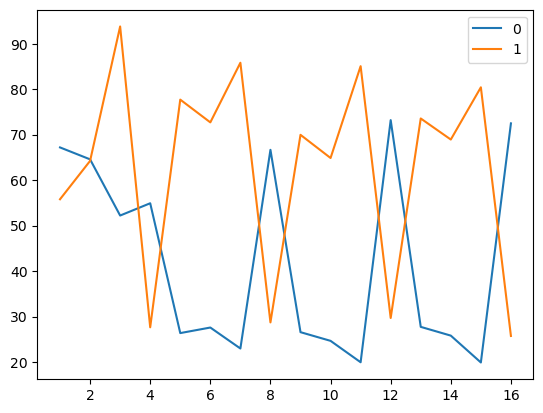

In [7]:
angles_a = []
angles_b = []
for yi in y:
    angles_a.append(angle_vecs(yi, pairs[0, 0]))
    angles_b.append(angle_vecs(yi, pairs[0, 1]))
    
angles_a = np.array(angles_a)
angles_b = np.array(angles_b)
times = np.arange(16, dtype='int8')
plt.plot(times+1, angles_a[times], label='0')
plt.plot(times+1, angles_b[times], label='1')
plt.legend()
plt.show()

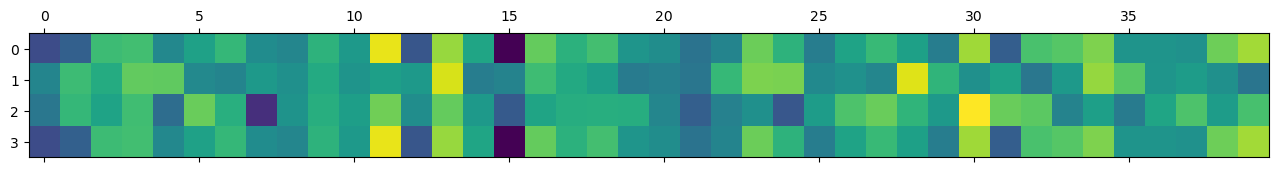

In [8]:
# Let us consider two completely independent pairs of stimuli
id_pair1 = 0
id_pair2 = 10

plt.matshow(np.vstack([pairs[id_pair1], pairs[id_pair2]]))
plt.show()

_, h1 = predict_single(torch.Tensor(sequence[0][id_pair1:id_pair1+1]), model)
_, h2 = predict_single(torch.Tensor(sequence[0][id_pair2:id_pair2+1]), model)

In [16]:
h1.shape

(40, 200)

(40, 200)
(40, 200)


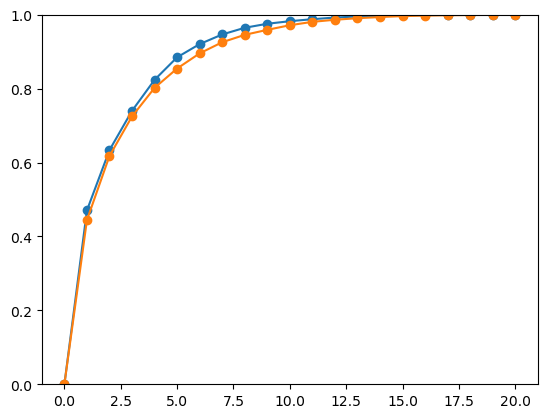

In [21]:
pca1 = stats.pca_cumvar(h1)
pca2 = stats.pca_cumvar(h2)

In [40]:
h1_subs = pca1.components_[:7]
h2_subs = pca2.components_[:7]
print(h1_subs.shape)
print(h2_subs.shape)

(7, 200)
(7, 200)


In [41]:
import imp
imp.reload(pa)

<module 'principal_angles' from '/Users/avalente/Documents/these/RNNlocalglobal/principal_angles.py'>

In [42]:
pa.principal_angles(h1_subs, h2_subs)

array([61.16552 , 67.2226  , 71.11669 , 77.99322 , 84.080475, 84.54417 ,
       86.065384], dtype=float32)

In [70]:
# AREFAIRE
def stimpair_angles(id_pair1, id_pair2, plot=False):
    inp1 = np.concatenate([seq[id_pair1:id_pair1+1] for seq in sequence], axis=0)
    inp2 = np.concatenate([seq[id_pair2:id_pair2+1] for seq in sequence], axis=0)
    
    print(inp1.shape)
    _, h1 = predict_single(torch.Tensor(inp1), model)
    _, h2 = predict_single(torch.Tensor(inp2), model)
                           
    pca1 = stats.pca_cumvar(h1)
    pca2 = stats.pca_cumvar(h2)
    
    h1_subs = pca1.components_[:10]
    h2_subs = pca2.components_[:10]
    return pa.principal_angles(h1_subs, h2_subs)

(4, 40, 40)
(160, 200)
(160, 200)


array([29.760357, 42.861797, 46.599747, 53.13314 , 60.2327  , 69.61756 ,
       74.143875, 77.967094, 82.28649 , 89.58192 ], dtype=float32)

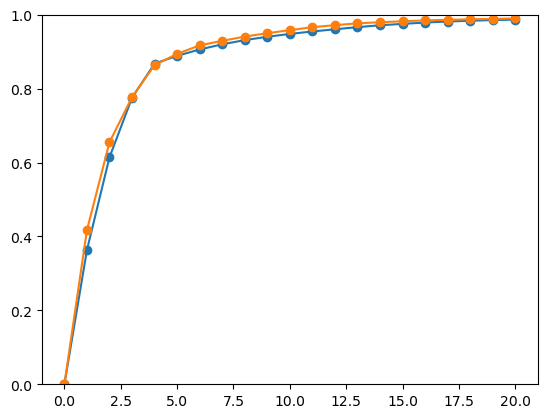

In [71]:
stimpair_angles(0, 15)

In [76]:
# AREFAIRE
def seqs_angles(id_seq1, id_seq2, id_pair, plot=False):
    _, h1 = predict_single(torch.Tensor(sequence[id_seq1][id_pair:id_pair+1]), model)
    _, h2 = predict_single(torch.Tensor(sequence[id_seq2][id_pair:id_pair+1]), model)
                           
    pca1 = stats.pca_cumvar(h1)
    pca2 = stats.pca_cumvar(h2)
    
    h1_subs = pca1.components_[:10]
    h2_subs = pca2.components_[:10]
    return pa.principal_angles(h1_subs, h2_subs)

In [77]:
seq[0]

[0, 0, 0, 0]

(40, 200)
(40, 200)


array([ 6.3762136, 15.434412 , 23.077505 , 32.155376 , 34.77392  ,
       51.046936 , 54.209835 , 63.602707 , 70.22342  , 78.185036 ],
      dtype=float32)

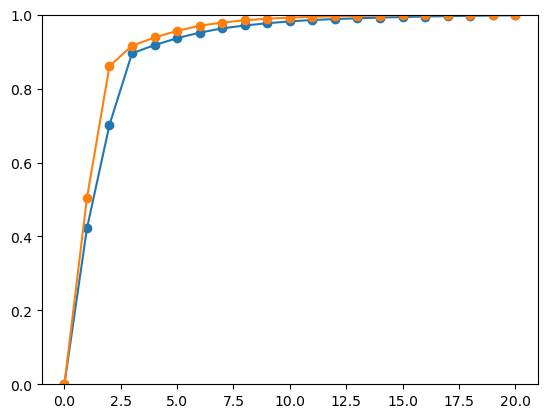

In [79]:
seqs_angles(1, 2, 0)

# Multiple models

In [31]:
Ratio = np.zeros((len(input_dim),len(hidden),len(layers),Nseq,4,ntrials))
Acc = np.zeros((len(input_dim),len(hidden),len(layers),Nseq,4,ntrials))
AngleAll = np.zeros((len(input_dim),len(hidden),len(layers),Nseq,4,ntrials,dict_size))


print('%s units per layer, %s layer' % (n_hidden, n_layers))
MSE = np.zeros((ntrials, len(test_sequence)))
Yhat = np.zeros((ntrials, len(test_sequence), 4, input_size))  # store prediction here
Ytrue = np.zeros((ntrials, len(test_sequence), 4, input_size))  # store ground truth
models = []

for k in range(ntrials):
    trainind = np.delete(np.arange(ntrials), k)
    train_x = []
    train_y = []
    # create data from numpy arrrays
    for i in range(len(seq)):
        train_x.append(torch.Tensor(sequence[i][trainind,:-1,:])) #!!-1 if no zero element after each chunk, otherwise -2
        train_y.append(torch.Tensor(sequence[i][trainind,-1,:]))

    # print(train_x[0].shape) # (n_trials-1) x (T-1) x d_in
    # print(train_y[0].shape) # (n_trials-1) x d_in
    
    # train network
    model = RNN(n_hidden, n_layers, input_size)
    Loss = train_model(train_x, train_y, model)
    # plt.figure()
    # plt.plot(Loss)
    # plt.show()

    # predict last 4 items of sequence
    for j in range(4):
        test_x = []
        for i in range(Nseq):
            test_x.append(torch.Tensor(test_sequence[i][k:k+1,:-4+j,:]))
        y, _ = predict(test_x, model)

        for i in range(Nseq):
            Yhat[k,i,j,:] = y[i][0,:]  # hard coded!, works only if output 1 sample
            Ytrue[k,i,j,:] = test_sequence[i][k,-4+j,:]
    models.append(model)

# Yhat and Ytrue: prediction and expected, for each left-out stimpair, for each sequence, for each of the 4 items, d_in vector

Error = np.zeros((len(test_sequence),ntrials))
Errordist = np.zeros((len(test_sequence),ntrials,dict_size-1))

for i in range(len(test_sequence)):
    for j in range(4):
        for k in range(ntrials):
            yhat = Yhat[k,i,j,:]
            ytrue = Ytrue[k,i,j,:]
            yrep = np.repeat(ytrue[None,:],dict_size,0)
            target_idx = np.argmin(np.mean(abs(yrep-dictionary),1))
            Error[i,k] = np.mean((yhat - ytrue)**2) # calculate mean squared error of predicted vector with ground truth
            yrep = np.repeat(yhat[None,:],dict_size-1,0)
            Errordist[i,k,:] = np.mean((yrep - np.delete(dictionary,target_idx,0))**2,1) # calculate mean squared error of predicted vector with ground truth
            # calculate ratio of samples equally small or smaller than sample
            Ratio[si,hi,li,i,j,k] = sum(Errordist[i,k,:]<=Error[i,k])/(dict_size-1)
            Acc[si,hi,li,i,j,k] = Error[i,k]<np.min(Errordist[i,k,]) #(np.min(Errordist[i,k,])-Error[i,k])/np.min(Errordist[i,k,]) 

            # angle with all vectors in dictionary
            yrep = np.repeat(yhat[None,:],dict_size,0)
            yrep = yrep/np.linalg.norm(yrep,1)
            dic = dictionary/np.linalg.norm(dictionary,1)
            for s in range(dict_size):
                AngleAll[si,hi,li,i,j,k,s] = np.arccos(yrep[s,:]@dic[s,:]) * 180/np.pi

    ax = plt.subplot(111)
    plt.hist(Error[i,],label='true',alpha=.6)
    plt.hist(np.min(Errordist[i,],-1),label='other targets min',alpha=.6)
    ax.set_title('Sequence: %s, Accuracy:%.3f, P=%.3f'%(seq_test[i],np.mean(Acc[si,hi,li,i,:]),np.mean(Ratio[si,hi,li,i,:])))
    ax.set_xlabel('Mean squared prediction error')
    ax.set_xlim(-0.02,3)
    plt.ylabel('Count')
    plt.legend()
    plt.savefig('NIP_error_seq_%s.png'%seq_test[i])
    plt.show()

200 units per layer, 1 layer
torch.Size([1, 36, 40])
torch.Size([1, 37, 40])
torch.Size([1, 38, 40])
torch.Size([1, 39, 40])
torch.Size([1, 36, 40])
torch.Size([1, 37, 40])
torch.Size([1, 38, 40])
torch.Size([1, 39, 40])
torch.Size([1, 36, 40])
torch.Size([1, 37, 40])
torch.Size([1, 38, 40])
torch.Size([1, 39, 40])
torch.Size([1, 36, 40])
torch.Size([1, 37, 40])
torch.Size([1, 38, 40])
torch.Size([1, 39, 40])
torch.Size([1, 36, 40])
torch.Size([1, 37, 40])
torch.Size([1, 38, 40])
torch.Size([1, 39, 40])


KeyboardInterrupt: 

# Visualize results

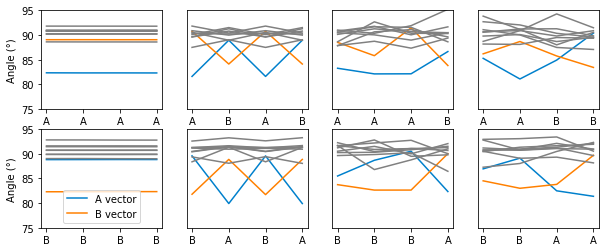

In [121]:
which_stim = [0,9]
xlabels = [['A','B'],['B','A']] # for correct x ticks
dict_size = dictionary.shape[0]
second_stim = []
fig,ax = plt.subplots(len(which_stim),Nseq,figsize=(10,4))

for which_seq in range(Nseq):
    for s,stim in enumerate(which_stim):
        for i in range(dict_size):
            if s==0:
                if i==0:
                    col= [0,.5,.8]
                elif i==1:
                    col = [1,.5,0]
                else:
                    col= [.5,.5,.5]
            else:
                if i==0:
                    col= [0,.5,0.8]
                elif i==1:
                    col = [1,.5,0]
                else:
                    col= [.5,.5,.5]
            ax[s,which_seq].plot(np.arange(4),AngleAll[0,0,0,which_seq,:,stim,i],color=col)
        ax[s,which_seq].set_xticks(np.arange(4))
        ticks = []
        for t in range(4):
            ticks.append(xlabels[s][seq_test[which_seq][t]])
        ax[s,which_seq].set_xticklabels(ticks)
        if which_seq>0:
            ax[s,which_seq].set_yticks(())
        ax[s,which_seq].set_ylim([75,95])
        ax[s,0].set_ylabel('Angle (°)')
    ax[s,0].legend(['A vector','B vector'])
        
plt.savefig('NIP_Example_Angles.pdf')


Input size

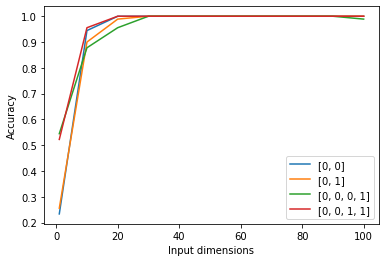

In [241]:
ax = plt.subplot(111)
for i in range(len(seq_test)):
    plt.errorbar(x=input_dim,y=np.mean(Acc[:,0,0,i,:],-1),label=seq_test[i])
#plt.xticks(np.arange(repeats),np.arange(repeats)+1)
ax.legend()
ax.set_xlabel('Input dimensions')
ax.set_ylabel('Accuracy')
plt.savefig('NIP_Accuracy_per_inputdim.pdf')
plt.show()